k - Nearest Neighbors

- k개의 인접한 데이터 중 더 많은 데이터의 클래스를 따라감

- k값 :  동점을 막기 위해 보통 홀수로 선정함

1. k 가 작으면 이상치 등 노이즈에 민감하게 반응하여 과대적합
    - k=1인 경우 가장 가까운 이웃과 같은 클래스

2. k 가 크면 자료의 패턴을 파악할 수 없어 과소적합
    -   k=N(전체 데이터 수)인 경우 평균의 개념이 됨

k에 대해 하이퍼 파라미터 튜닝이 필요하다.

K-NN

**가장 단순한 머신 러닝 알고리즘입니다. 머신 러닝 모델을 구축하는 작업은 학습 데이터 셋을 저장하는 행위로만 이루어지며, 새로운 데이터 포인트에 대한 예측은 학습 데이터 셋에서 가장 가까운 데이터 포인트를 찾음으로써 이루어집니다. 즉, ‘가장 가까운 이웃’을 찾는 것이 모델의 예측 방식입니다**

In [1]:
import numpy as np

In [2]:
# 도미 데이터
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0,
                500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0,
                610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0,
                714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [3]:
# 빙어 데이터
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

In [4]:
# column_stack : 1차원 배열을 2차원 배열로 만든다. 리스트 끼리를 더해서 연장해서 만들어준다.
fish_data = np.column_stack((bream_length+smelt_length, bream_weight+smelt_weight))
fish_data

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [5]:
# 도미 : 1 / 빙어 : 0
# 물고기의 종류에 대한 y값을 만들어 준다.
# concatenate 을 통하여 여러개의 셀은 하나로 합친다. 리스트를 합쳐서 ndarray 로 만들어준다.
# fish_data의 순서에 맞게 도미, 빙어 순으로 넣어준다.
# np.ones() 함수는 주어진 형태(shape)의 배열을 생성하며, 모든 요소를 1로 초기화합니다
# np.zeros() 함수는 주어진 형태(shape)의 배열을 생성하며, 모든 요소를 0으로 초기화합니다.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [6]:
import matplotlib.pyplot as plt

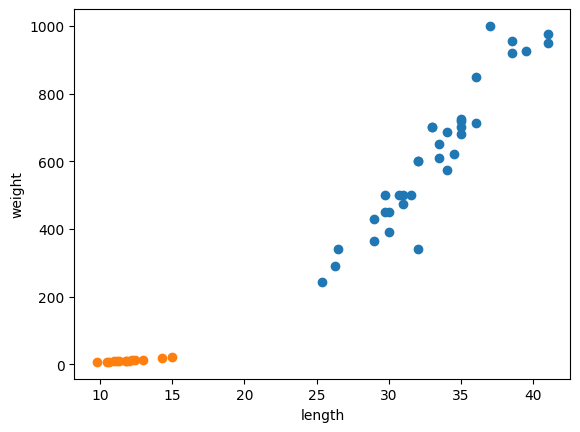

In [7]:
# scatter : 두 변수 간에 관계를 시작적으로 확인 할 수 있도록
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
# 데이터 분할
x_train, x_test, y_train, y_test = train_test_split(fish_data, fish_target, test_size=0.3, random_state=1)

In [10]:
# 분류를 사용하기에 가장 쉽고 간단하게 사용하기 좋은 
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier()

In [12]:
# 모델 학습
model.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
# 결과
model.score(x_test, y_test)

1.0

In [14]:
# 길이가 20, 무게 150인 물고기는??
# 빙어
print(model.predict([[20, 150]]))

[0.]


In [15]:
# 길이 20 무게가 150인 물고기가 어떤 것이 있는지 확인해 보자.
# 내가 선택한 점에 대해 가장 가까운 것들과 연결해서  (유클리어 디스컨스)
# 기본적으로 kneighbors는 5개의 데이터를 나타낸다.
# 근접했던 실제 학습데이터의 물고기 무게 
# 근접했던 실제 학습데이터의 물고기 길이
# 근접했던 실제 학습데이터의 물고기 종류
dist, idx = model.kneighbors([[20, 150]])
print(dist)
print(x_train[idx])
print(y_train[idx])

[[ 92.158342   130.42461424 137.97767935 138.02057818 140.14167831]]
[[[ 25.4 242. ]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]
  [ 26.3 290. ]]]
[[1. 0. 0. 0. 1.]]


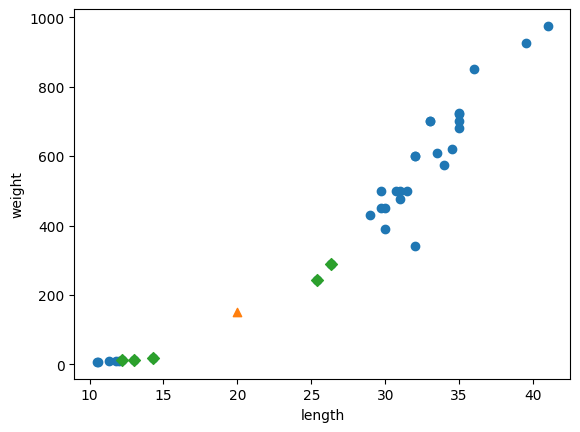

In [16]:
# 빙어에 대한 학습데이터와 도미에 대한 학습데이터의 분포도를 표시
# 특정 길이 20 무게가 150인 물고기의 표시를 삼각형으로 나타낸다.
# 가장 가까운 5마리는 다이어몬드로 표시
# 모델 선정은 이상치 보일 수 있지만 가장 가까운 값이 많은 것을 예측하는 것이다.
plt.scatter(x_train[:, 0], x_train[:, 1])
plt.scatter(20, 150, marker="^")
plt.scatter(x_train[idx,0], x_train[idx,1], marker="D")
plt.xlabel("length")
plt.ylabel("weight")
plt.show()